<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/5_Clasificaci%C3%B3n_y_evaluaci%C3%B3n_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. Clasificación y evaluación**

### Objetivo
Que la o el estudiante aprenda el procedimiento general para entrenar y evaluar modelos de aprendizaje automático

### Descripción del procedimiento a seguir
- Se carga el conjunto de datos bivariateDataPoints.csv
- Se separan los datos en entrenamiento, validación y prueba.
- Se entrena un modelo de K vecinos más cercanos.
- Se evalúa en el conjunto de datos de validación y de prueba.
- Se deja de ejercicio entrenar un modelo para el dataset AppleQuality


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://seaborn.pydata.org/
2. https://pandas.pydata.org/
3. https://numpy.org/
4. https://matplotlib.org/
5. https://scikit-learn.org/stable/


### **1. Importar bibliotecas**
Se importan las bibliotecas que se van a utilizar. Se presenta la biblioteca Seaborn [https://seaborn.pydata.org/] usada para graficación de datos estadísticos.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier   #Modelo de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix  #Metricas
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Carga de datos**
- Se carga el archivo bivariateDataPoints.csv y se visualiza una muestra

In [ ]:
file_path = '/content/drive/MyDrive/Curso ML Diplomado/5.P. Train and eval/bivariateDataPoints.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.head()

,X1,X2,Class
0,2.496714,2.723471,0
1,2.647689,6.046060,0
2,1.765847,2.531726,0
3,3.579213,4.534869,0
4,1.530526,4.085120,0


In [ ]:
df['Class'].unique()

array([0, 1])

### **3. Separación de características y etiquetas**
- Se crea una nueva variable llamada X que contendrá las características de los ejemplos del dataset.
- Se crea una nueva variable llamada y que contendrá las etiquetas de los ejemplos del dataset.

In [ ]:
X = df[['X1', 'X2']]
y = df['Class']

### **4. Separación en subconjuntos de entrenamiento, validación y prueba.**
- Se utiliza la función *train_test_split* de la biblioteca Scikit-learn para separar el conjunto de datos introducido en dos. Como un primer paso, se separa en subconjunto de entrenamiento (70%) y uno temporal (30%).
- Posteriormente, se introduce a la función *train_test_split*  el subconjunto temporal para ahora separarlo en dos partes iguales que serán el conjunto de validación y de prueba.
- Finalmente se usa *shape* para conocer los tamaños de los conjuntos separados.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


### **5. Entrenaniemto del algoritmo de clasificación K vecinos más cercanos (KNN) y evaluación**
Para esta práctica, vamos a entrenar y evaluar usando varios números de vecinos (hyperparámetros):
  - (n_neighbors=3)
  - (n_neighbors=5)
  - (n_neighbors=7)
  - (n_neighbors=9)
- Entrenamos el modelo con los datos de entrenamiento
- Evaluamos el modelo con los datos de validación

**5.1 Entrenamos el modelo con el conjunto de entrenamiento**

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Aqui ajustamos el número de vecinos

# Ajustamos el modelo a los datos de entrenamiento
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**5.2. Evaluamos el modelo con en el conjunto de validación**

Validation Set:
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[15  0]
 [ 2 13]]


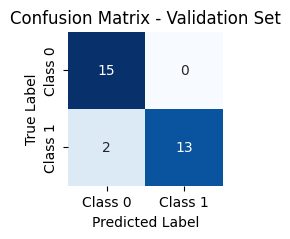

In [ ]:
# Predicciones en el conjunto de validación
y_val_pred = knn_classifier.predict(X_val)

# Evaluar con las métricas exactitud y matriz de confusión
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

# Imprimir los resultados de evaluación
print("Validation Set:")
print("Accuracy:", accuracy_val)
print("Confusion Matrix:\n", conf_matrix_val)

# Grafica la matriz de confusión para mejor visualización
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Repite toda la sección 5 usando los valores n_neighbors indicados al inicio.
Elige el mejor valor de k.

### **6. Evaluación en el conjunto de prueba con el número de vecinos con los mejores resultados**

In [ ]:
y_test_pred = knn_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Imprime los resultados de evaluación
print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Confusion Matrix:\n", conf_matrix_test)


Test Set:
Accuracy: 1.0
Confusion Matrix:
 [[15  0]
 [ 0 15]]


### **7. Usando el conjunto de datos de *Apple Quality*, crea un modelo de KNN para clasificar si la manzana es buena o mala.**

Separa el conjunto de datos en train, validation y test. Prueba con distintos valores de vecinos más cercanos en el conjunto de validación y elige el mejor para evaluar con el conjunto test.

La métrica que se usará para saber cuál es el mejor es f1_score, puedes encontrar información en:

https://scikit-learn.org/stable/modules/model_evaluation.html

NOTA: ¿En que consiste la columna 'A_id'? ¿Crees que debería ser una característica?
